## Observations and Insights 

In [452]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Create dfs for both data files
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

# Combine the data into a single dataset with study results listed first, then mouse metadata. 
#This combines all data from each set, with no preference for one dataset vs the other
merged_df = pd.merge(study_results_df, mouse_metadata_df, on="Mouse ID", how="outer")

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [375]:
# Checking the number of mice.
merged_df["Mouse ID"].nunique()


249

In [379]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint:
#find duplicated rows for Mouse ID and Timepoint first
duplicates = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]

#Locate the unique mouse ID from the duplicated data and display it
duplicate_mouse = duplicates.loc[:,"Mouse ID"].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [382]:
# Optional: Get all the data for the duplicate mouse ID.

#Locate all rows of data for the duplicated mouse by its ID number
g989_df = merged_df.loc[(merged_df["Mouse ID"]=="g989")]

#Display the data
g989_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [256]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index_names = merged_df[merged_df['Mouse ID'] == "g989" ].index
merged_df.drop(index_names, inplace = True)

#Display the cleaned df
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [257]:
# Checking the number of mice in the clean DataFrame.
merged_df["Mouse ID"].nunique()


248

## Summary Statistics

In [258]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
group_treatments = merged_df.groupby("Drug Regimen")


#Set a variable for tumor column for ease of function set up
tumor = group_treatments["Tumor Volume (mm3)"]

# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_tumor = tumor.mean()
median_tumor = tumor.median()
stdev_tumor = tumor.std()
sem_tumor = tumor.sem()

# Assemble the resulting series into a single summary dataframe.
tumor_volume_df = pd.DataFrame({"Mean Tumor Volume (mm3)": mean_tumor, "Median Tumor Volume (mm3)":
                               median_tumor, "Standard Deviation":stdev_tumor, "SEM":sem_tumor})

#Display the summary df
tumor_volume_df


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [259]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_tumor = tumor.agg(["mean", "median", "std", "sem"])

#Display the summary table
summary_stats_tumor

,mean,median,std,sem
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.320930,50.446266,6.622085,0.544332
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Total Measurements Taken')

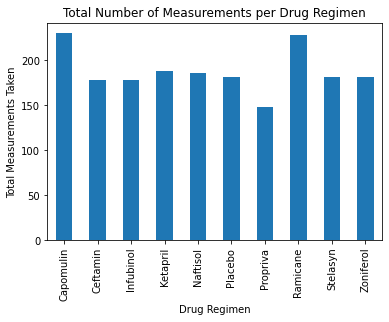

In [260]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
treatment_count = group_treatments["Tumor Volume (mm3)"].count()
treatment_count

#Plot the bar chart with title
treatment_count_chart = treatment_count.plot(kind = "bar", title = "Total Number of Measurements per Drug Regimen")
treatment_count_chart.set_ylabel("Total Measurements Taken")

#This will set the drug names at 45 degrees if I want it, but it also prints the list of drugs out ahead of the plot...why?
# treatment_count_chart.set_xticklabels(treatment_count.index,rotation = 45)




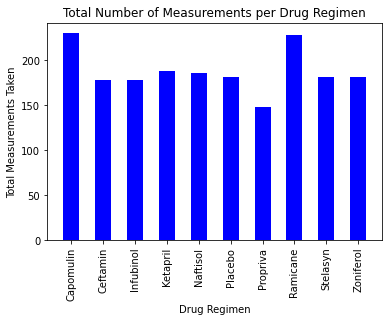

In [261]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Use groupby data from previous cell to get counts of measurements and names of drugs into arrays
number_treatments = treatment_count.values
drug_names = treatment_count.index.values

#Plot data into bar graph

#Set x-axis bars to the number of drug names
x_axis = np.arange(len(drug_names))

#Set the chart type as bar, x-axis is the number of drug names, y is the number of treatments, set color and width of bars
plt.bar(x_axis, number_treatments, color = 'b', align='center', width=0.5)

#Set placement of x-axis headers - this will place one tick at each bar. Note that rotation = 90 is what made the 2-8 go away. Why?
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_names, rotation = 90)

#Note that the below step seems to not affect the graph at all, unless I change the numbers there
plt.xlim(-0.75, len(drug_names)-0.25)

#Set the titles of chart and each axis
plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")

#show the plot
plt.show()



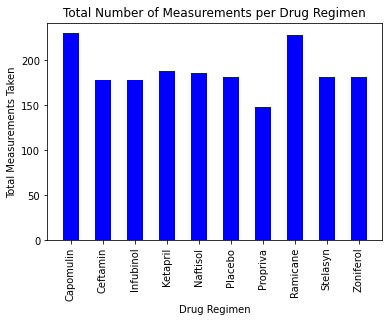

In [262]:
#Note that I really don't have to do all of the steps above to get this plot....
plt.bar(drug_names, number_treatments, color = 'b', align='center', width=0.5)
plt.xticks(rotation = 90)

plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")
plt.show()


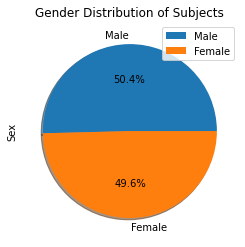

In [329]:

#Generate a pie plot showing the distribution of female versus male mice using pandas

#Groupby unique mouse ID and Sex with count function to display
gender = merged_df.groupby(["Mouse ID", "Sex"]).count()

#Reset the indext to access "Sex" Column
gender_index_reset =gender.reset_index()

#Count the number of males and females 
gender_dist = gender_index_reset["Sex"].value_counts()

#Convert grouby object to df to plot with pandas
gender_dist_df = pd.DataFrame(gender_dist)
gender_dist_df

gender_chart = gender_dist_df.plot(kind = "pie", y='Sex', shadow = True, autopct='%1.1f%%', title = "Gender Distribution of Subjects")


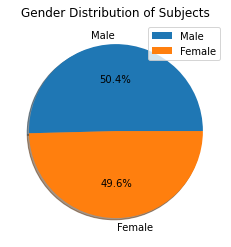

In [326]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Only pull male mouse entries
males_df = merged_df.loc[merged_df["Sex"] == "Male", :]

#Count the number of males using the unique Mouse ID
total_males = len(males_df["Mouse ID"].unique())
total_males

#Only pull female mice
females_df = merged_df.loc[merged_df["Sex"] == "Female", :]

#Count the number of females using the unique Mouse ID
total_females = len(females_df["Mouse ID"].unique())

#Plot the pie chart with title
# gender_chart = gender_dist.plot(kind = "pie", title = "Gender Distribution of Subjects")

sex = ["Male", "Female"]
numbers = [total_males, total_females]

plt.pie(numbers, labels = sex, autopct="%1.1f%%", shadow = True)
plt.legend(sex)
plt.title("Gender Distribution of Subjects")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

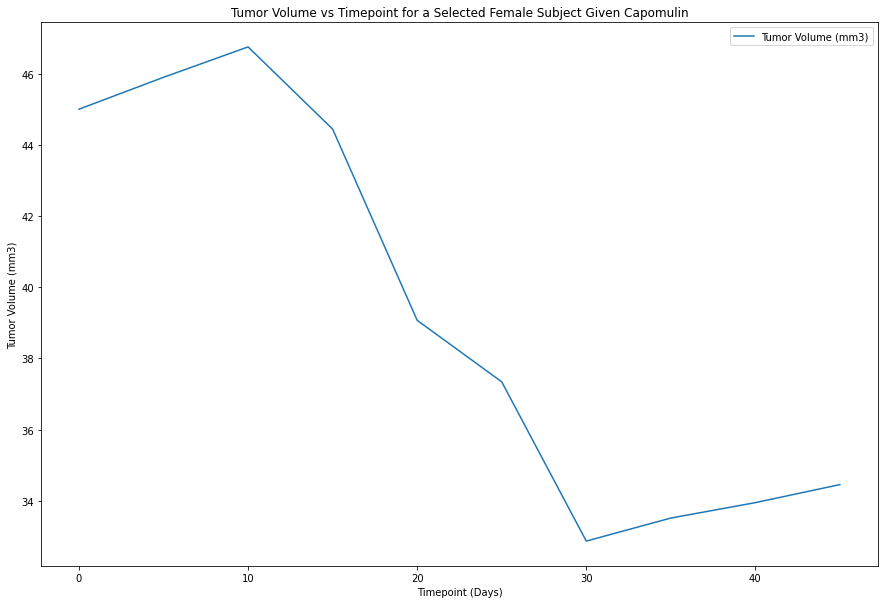

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1848,t565,0,45.000000,0,Capomulin,Female,20,17
1849,t565,5,45.895647,0,Capomulin,Female,20,17
1850,t565,10,46.749006,0,Capomulin,Female,20,17
1851,t565,15,44.440949,0,Capomulin,Female,20,17
1852,t565,20,39.070214,0,Capomulin,Female,20,17
1853,t565,25,37.342210,0,Capomulin,Female,20,17
1854,t565,30,32.868916,0,Capomulin,Female,20,17
1855,t565,35,33.515671,0,Capomulin,Female,20,17
1856,t565,40,33.949341,0,Capomulin,Female,20,17
1857,t565,45,34.455298,0,Capomulin,Female,20,17


In [419]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mouse_df = merged_df.loc[(merged_df["Mouse ID"]== "t565")]
capomulin_mouse_df

capomulin_mouse_df.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)", figsize = (15,10), title="Tumor Volume vs Timepoint for a Selected Female Subject Given Capomulin")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (Days)")
plt.show()

capomulin_mouse_df

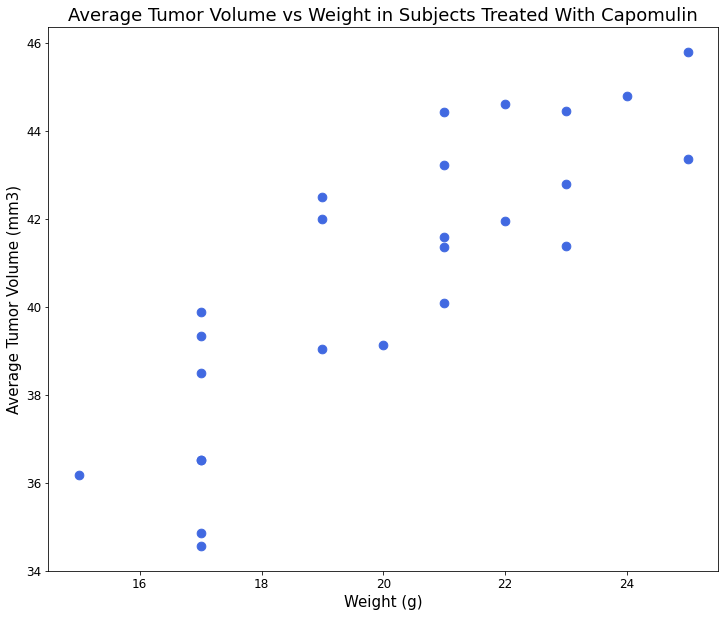

In [459]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#Select data for animals treated with capomulin
capomulin_df = merged_df.loc[(merged_df["Drug Regimen"]== "Capomulin")]

#Calculate the mean of the tumor volume (and, consequently, weight, but the weight remains constant per animal anyway)
avg_tumor_vol = capomulin_df.groupby(["Mouse ID"]).mean()

#Plot data as a scatter plot - can you change font of title here?
avg_tumor_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=(75), figsize = (12,10),
                   title=" Average Tumor Volume vs Weight in Subjects Treated with Capomulin", fontsize = 12, color = 'royalblue')

#Give titles to each axis and main plot with font changes
plt.ylabel("Average Tumor Volume (mm3)", fontsize=15)
plt.xlabel("Weight (g)", fontsize = 15)
plt.title("Average Tumor Volume vs Weight in Subjects Treated With Capomulin", fontsize = 18)

#Display the plot
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


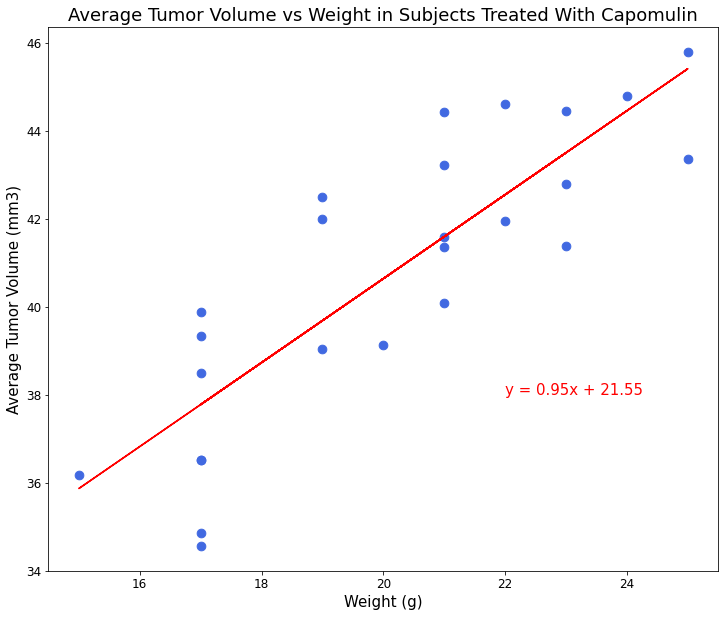

In [473]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#Calculate the correlation and display
correlation = st.pearsonr(avg_tumor_vol["Tumor Volume (mm3)"], avg_tumor_vol["Weight (g)"])
print(f"The correlation between both factors is {round(correlation[0],2)}")

#Calculate the linear regression
x_values = avg_tumor_vol["Weight (g)"]
y_values = avg_tumor_vol["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot data as a scatter plot - can you change font of title here?
avg_tumor_vol.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", s=(75), figsize = (12,10),
                   title=" Average Tumor Volume vs Weight in Subjects Treated with Capomulin", fontsize = 12, color = 'royalblue')

#Give titles to each axis and main plot with font changes
plt.ylabel("Average Tumor Volume (mm3)", fontsize=15)
plt.xlabel("Weight (g)", fontsize = 15)
plt.title("Average Tumor Volume vs Weight in Subjects Treated With Capomulin", fontsize = 18)

#Display the plot
plt.plot(x_values, regress_values, 'r')
plt.annotate(line_eq,(22,38),fontsize=15,color="red")
plt.show()


